In [1]:
#Importing the libraries that will be used in this program.

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #For KNN classifier
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import numpy as np

#This command is used to plot figures in our jupyter notebook

%matplotlib inline

In [2]:
#Importing the data into our program.

data = pd.read_csv('Dataset1.csv')

In [3]:
#Creating a dataframe for the data using pandas library.

df = pd.DataFrame(data)

In [4]:
#Overview of the dataframe. head() command only gives the values for the first 5 rows.

df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
0,0.0133,0.773,204014,0.507,0.26,1,0.170,-9.584,1,0.0505,126.043,0.304,1
1,0.1750,0.661,265947,0.748,0.00,2,0.254,-4.809,0,0.2060,171.983,0.509,1
2,0.1280,0.755,141827,0.772,0.00,6,0.157,-5.585,1,0.4000,132.906,0.678,1
3,0.0169,0.852,216600,0.752,0.00,1,0.394,-5.793,1,0.0597,89.950,0.389,1
4,0.1450,0.808,210800,0.745,0.00,10,0.292,-5.260,0,0.3420,165.995,0.829,1


In [5]:
#Assigning all the features to the variable X.

X = df.drop(['target'], axis='columns')
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.0133,0.773,204014,0.507,0.26,1,0.170,-9.584,1,0.0505,126.043,0.304
1,0.1750,0.661,265947,0.748,0.00,2,0.254,-4.809,0,0.2060,171.983,0.509
2,0.1280,0.755,141827,0.772,0.00,6,0.157,-5.585,1,0.4000,132.906,0.678
3,0.0169,0.852,216600,0.752,0.00,1,0.394,-5.793,1,0.0597,89.950,0.389
4,0.1450,0.808,210800,0.745,0.00,10,0.292,-5.260,0,0.3420,165.995,0.829


In [6]:
#Assigning the labaelled class to variable y.

y = df.target

In [7]:
#Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 17)

In [8]:
print(X_train.shape,X_test.shape)

(1032, 12) (345, 12)


In [9]:
#The model

model = neighbors.KNeighborsClassifier(n_neighbors=12, p=1)

#Fitting the model

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [10]:
#To get the classification report such as precision and recall, which are useful for us in this project.

y_expect = y_test
y_pred = model.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56       168
           1       0.54      0.41      0.47       177

    accuracy                           0.52       345
   macro avg       0.52      0.52      0.51       345
weighted avg       0.52      0.52      0.51       345



In [11]:
#To check the accuracy

model.score(X_test, y_test)

0.5159420289855072

# Confusion Matrix

In [12]:
y_pred = model.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,  63],
       [104,  73]], dtype=int64)

Text(69.0, 0.5, 'Truth')

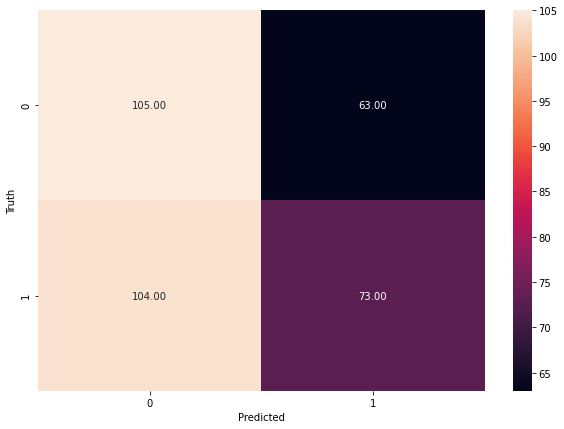

In [14]:
#To plot the confusion matrix

plt.figure(figsize=(10,7))

sn.heatmap(cm, annot = True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')